In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import phik
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dseb-64-data-preparation-final-project/dseb63_columns_description.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_sample_submission.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_bureau_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_installments_payments.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_p

**application_{train|test}.csv**

In [2]:
application_train = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv')
print('application_train data shape: ', application_train.shape)
application_train.head()

application_train data shape:  (246009, 123)


,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,NaN,NaN,NaN,

In [3]:
print('-'*80)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 123)
--------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
--------------------------------------------------------------------------------


In [4]:
application_test = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_test.csv')
print('application_test data shape: ', application_test.shape)
application_test.head()

application_test data shape:  (61502, 122)


,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / secondary special,S

In [5]:
print('-'*80)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 122)
--------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
--------------------------------------------------------------------------------


# 1. Data overview

In [6]:
credit_card_balance = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv')
print('POS cash balance data shape: ', credit_card_balance.shape)
credit_card_balance.head()

POS cash balance data shape:  (3227965, 23)


,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,9000.0,15488.685,16809.210,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,4500.0,26125.020,27577.890,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,60301.170,65609.235,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,4500.0,63975.015,70475.850,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [7]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [8]:
credit_card_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3227965.0,1.903894e+06,536741.485168,1000018.000,1431613.0,1896076.00,2369259.000,2843493.000
MONTHS_BALANCE,3227965.0,-3.471544e+01,26.636089,-96.000,-56.0,-28.00,-11.000,-1.000
AMT_BALANCE,3227965.0,5.907332e+04,106613.654377,-420250.185,0.0,0.00,90405.540,1354829.265
AMT_CREDIT_LIMIT_ACTUAL,3227965.0,1.529536e+05,163709.196232,0.000,45000.0,112500.00,180000.000,1350000.000
AMT_DRAWINGS_ATM_CURRENT,2622211.0,6.024272e+03,28421.163969,-6827.310,0.0,0.00,0.000,2115000.000
AMT_DRAWINGS_CURRENT,3227965.0,7.494084e+03,33967.429845,-6211.620,0.0,0.00,0.000,2115000.000
AMT_DRAWINGS_OTHER_CURRENT,2622211.0,2.984882e+02,8396.192507,0.000,0.0,0.00,0.000,1529847.000
AMT_DRAWINGS_POS_CURRENT,2622211.0,2.884152e+03,20388.326800,0.000,0.0,0.00,0.000,2060030.160
AMT_INST_MIN_REGULARITY,2963581.0,3.599681e+03,5611.741784,0.000,0.0,0.00,6750.000,202882.005
AMT_PAYMENT_CURRENT,2607872.0,1.023861e+04,35864.325093,0.000,155.7,2923.02,9000.000,4289207.445


In [9]:
print(f'The shape of POS_CASH_balance.csv is: {credit_card_balance.shape}')
print('-'*80)
print(f'Number of unique SK_ID_PREV in dseb63_installments_payments.csv are: {len(credit_card_balance.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_installments_payments.csv are: {len(credit_card_balance.SK_ID_CURR.unique())}')
print('-'*80)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_credit_card_balance.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(credit_card_balance.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_credit_card_balance.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(credit_card_balance.SK_ID_CURR.unique())))}')
print('-'*80)
print(f'Number of duplicate values in credit_card_balance: {credit_card_balance.shape[0] - credit_card_balance.duplicated().shape[0]}')

The shape of POS_CASH_balance.csv is: (3227965, 23)
--------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_installments_payments.csv are: 87452
Number of unique SK_ID_CURR in dseb63_installments_payments.csv are: 86905
--------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and dseb63_credit_card_balance.csv are: 69536
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and dseb63_credit_card_balance.csv are: 17369
--------------------------------------------------------------------------------
Number of duplicate values in credit_card_balance: 0


# 2. Checking imbalance

The imbalance ratio (IR) is typically defined as:\
Imbalance Ratio = Number of samples in the majority class/ Number of samples in the minority class
* An imbalance ratio close to 1 indicates a balanced dataset (e.g., equal or nearly equal numbers of samples in each class).
* A low imbalance ratio (e.g., close to 0) indicates significant imbalance, meaning one class dominates the dataset.

In [10]:
"""
This file contains functions to calculate imbalance ratio of a dataset.

Functions:
    1. imbalance_col: function
        Function to create a dataframe of imbalance columns.
"""

def imbalance_col(data):
    """
    Function to create a dataframe of imbalance columns.

    Inputs:
        data: DataFrame
            The dataset for which to calculate imbalance ratios.

    Returns:
        DataFrame of imbalance columns and their respective imbalance ratios.
    """
    # Filter out columns containing '_ID_'
    relevant_columns = [col for col in data.columns if '_ID_' not in col]
    data = data[relevant_columns]

    imbalance_ratios = {}

    for col in data.columns:
        value_counts = data[col].value_counts()

        if data[col].dtype == 'object':
            # Categorical column imbalance ratio
            if len(value_counts) > 1:
                imbalance_ratios[col] = value_counts.min() / value_counts.max()
            else:
                imbalance_ratios[col] = None
        else:
            # Numerical column imbalance ratio for binary values (0 and 1)
            if set([0, 1]).issubset(value_counts.index):
                imbalance_ratios[col] = value_counts[1] / value_counts[0]
            else:
                imbalance_ratios[col] = None

    # Print imbalance ratios for all columns
    for col, ratio in imbalance_ratios.items():
        print(
            f"Imbalance Ratio for column '{col}': {f'{ratio:.4f}' if ratio is not None else 'None'}"
        )

    print('-' * 80)

    # Filter out columns with no valid imbalance ratio
    valid_ratios = {col: ratio for col, ratio in imbalance_ratios.items() if ratio is not None}

    if not valid_ratios:
        print("All columns do not have data to calculate the imbalance ratio.")
        return None

    # Find the column with the highest imbalance ratio
    max_imbalance_col = max(valid_ratios, key=valid_ratios.get)
    print(
        f"The column with the heaviest imbalance ratio is '{max_imbalance_col}' "
        f"with a ratio of {valid_ratios[max_imbalance_col]:.4f}"
    )

    # Return as a DataFrame for further use
    return pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance Ratio'])


In [11]:
imbalance_col(credit_card_balance)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'AMT_BALANCE': None
Imbalance Ratio for column 'AMT_CREDIT_LIMIT_ACTUAL': None
Imbalance Ratio for column 'AMT_DRAWINGS_ATM_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_OTHER_CURRENT': None
Imbalance Ratio for column 'AMT_DRAWINGS_POS_CURRENT': None
Imbalance Ratio for column 'AMT_INST_MIN_REGULARITY': None
Imbalance Ratio for column 'AMT_PAYMENT_CURRENT': None
Imbalance Ratio for column 'AMT_PAYMENT_TOTAL_CURRENT': None
Imbalance Ratio for column 'AMT_RECEIVABLE_PRINCIPAL': None
Imbalance Ratio for column 'AMT_RECIVABLE': None
Imbalance Ratio for column 'AMT_TOTAL_RECEIVABLE': None
Imbalance Ratio for column 'CNT_DRAWINGS_ATM_CURRENT': 0.0809
Imbalance Ratio for column 'CNT_DRAWINGS_CURRENT': 0.0728
Imbalance Ratio for column 'CNT_DRAWINGS_OTHER_CURRENT': 0.0038
Imbalance Ratio for column 'CNT_DRAWINGS_POS_CURRENT': 0.0249
Imbalance Ratio for 

,Imbalance Ratio
CNT_DRAWINGS_ATM_CURRENT,0.080908
CNT_DRAWINGS_CURRENT,0.072752
CNT_DRAWINGS_OTHER_CURRENT,0.003831
CNT_DRAWINGS_POS_CURRENT,0.024894
CNT_INSTALMENT_MATURE_CUM,0.170145
NAME_CONTRACT_STATUS,0.000002
SK_DPD,0.025658
SK_DPD_DEF,0.023167


## Observations 1

### 1. Highly Imbalanced Columns
- Columns with very low imbalance ratios (close to 0), indicating significant skewness where one category overwhelmingly dominates:
  - `NAME_CONTRACT_STATUS`: 0.000002
  - `CNT_DRAWINGS_OTHER_CURRENT`: 0.003831
  - `SK_DPD`: 0.025658
  - `SK_DPD_DEF`: 0.023167
  - `CNT_DRAWINGS_POS_CURRENT`: 0.024894
  - `CNT_DRAWINGS_ATM_CURRENT`: 0.080908
  - `CNT_DRAWINGS_CURRENT`: 0.072752
---

### 2. Columns with `None`
- Columns for which the imbalance ratio could not be computed due to insufficient data or missing values:
  - `AMT_TOTAL_RECEIVABLE`
  - `AMT_RECIVABLE`
  - `AMT_RECEIVABLE_PRINCIPAL`
  - `AMT_PAYMENT_TOTAL_CURRENT`
  - `AMT_PAYMENT_CURRENT`
  - `AMT_INST_MIN_REGULARITY`
  - `AMT_DRAWINGS_POS_CURRENT`
  - `AMT_DRAWINGS_OTHER_CURRENT`
  - `AMT_DRAWINGS_CURRENT`
  - `AMT_DRAWINGS_ATM_CURRENT`
  - `AMT_CREDIT_LIMIT_ACTUAL`
  - `AMT_BALANCE`
  - `MONTHS_BALANCE`

- The absence of an imbalance ratio could be due to:
  - Insufficient unique values or missing data.
  - Lack of conditions suitable for ratio computation.
- Recommendation: Handle missing data appropriately to improve model training.

---

### 3. Moderate Imbalances
- Columns with some degree of imbalance, though not extreme:
  - `CNT_INSTALMENT_MATURE_CUM`: 0.170145
- These columns may not require immediate adjustment depending on the use case.\
Half of the columns of the dataset are imbalance.



# 3. Checking outliers

In [12]:
def plot_boxplots(data, numerical_columns):
    """
    Creates box plots for each numerical column to visualize outliers.

    Parameters:
        data (DataFrame): The input dataset.
        numerical_columns (list): List of numerical column names.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def get_outliers(data, outlier_threshold=1.5):
    """
    Identifies rows containing outliers for numerical columns based on the IQR method.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Returns:
        DataFrame: Rows containing outliers for numerical columns.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Calculate Q1, Q3, and IQR for numerical columns
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the IQR method
    outliers = ((data[numerical_columns] < (q1 - outlier_threshold * iqr)) |
                (data[numerical_columns] > (q3 + outlier_threshold * iqr)))

    return data[outliers.any(axis=1)]

def outlier(data, outlier_threshold=1.5):
    """
    Main function to visualize and identify outliers in the dataset.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Outputs:
        Prints a DataFrame containing rows with outliers.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Plot boxplots for numerical columns
    plot_boxplots(data, numerical_columns)

    # Get rows with outliers
    rows_with_outliers = get_outliers(data, outlier_threshold)
    print("Rows with outliers:")
    print(rows_with_outliers)

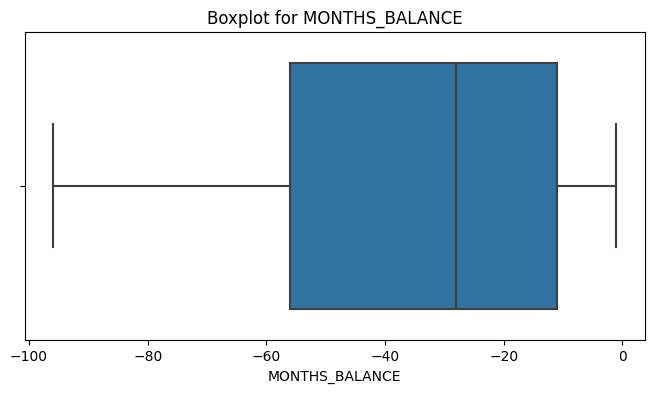

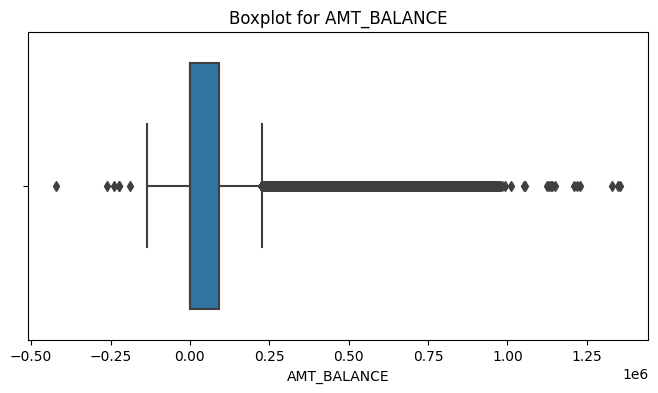

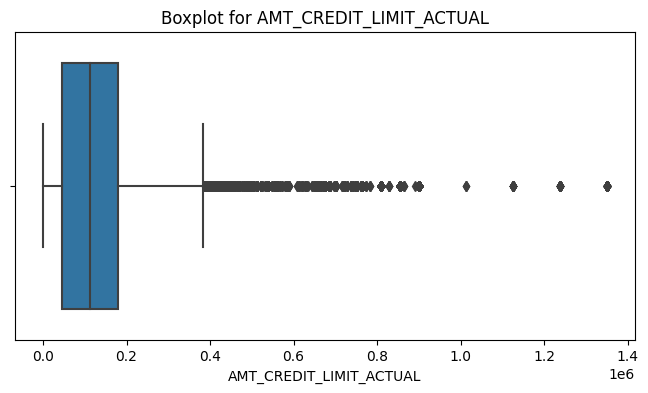

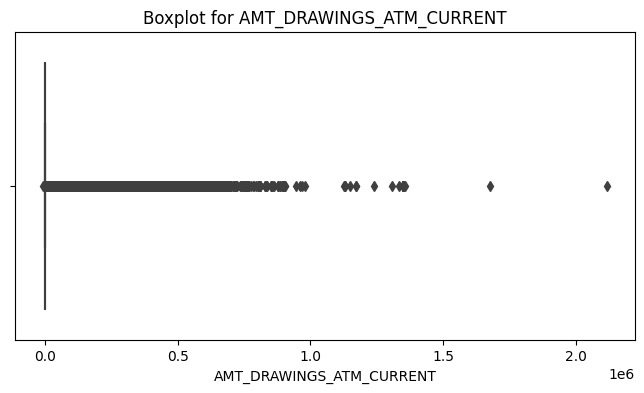

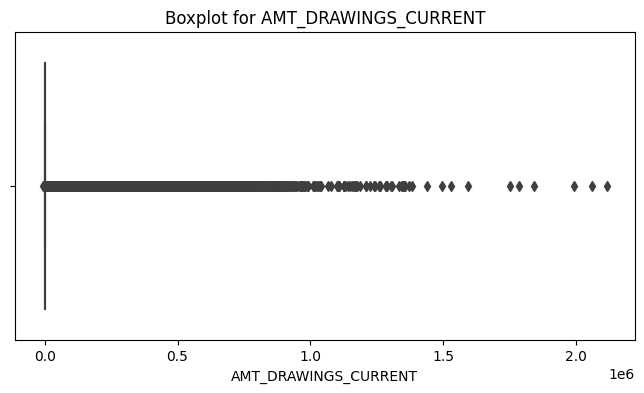

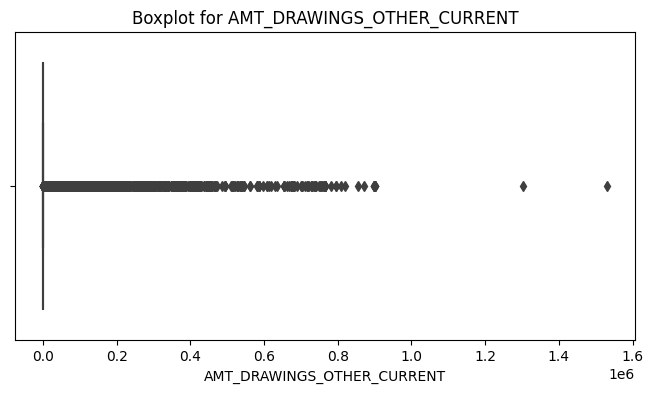

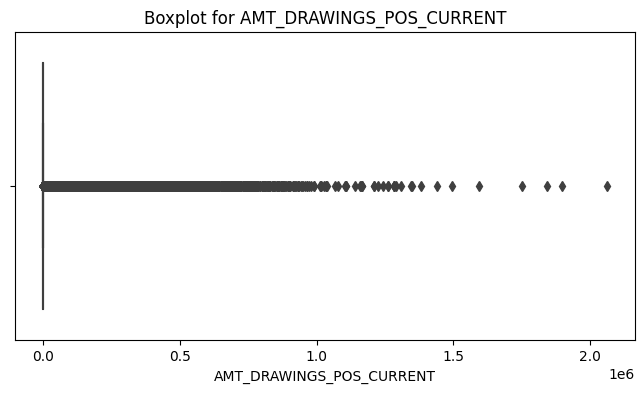

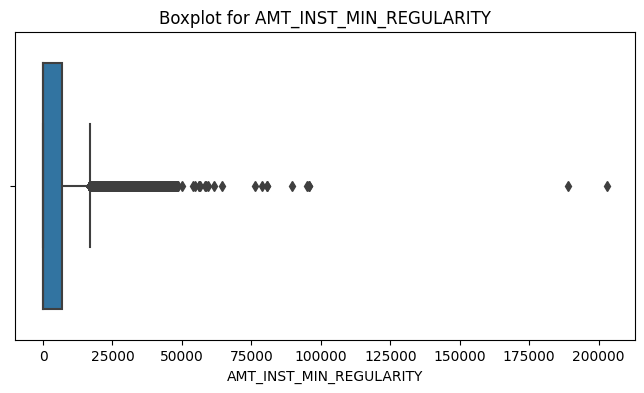

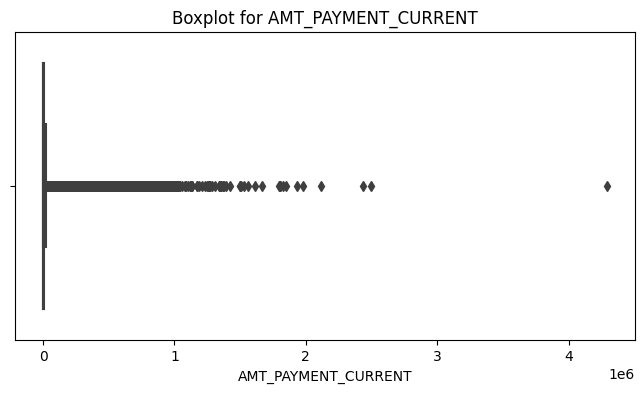

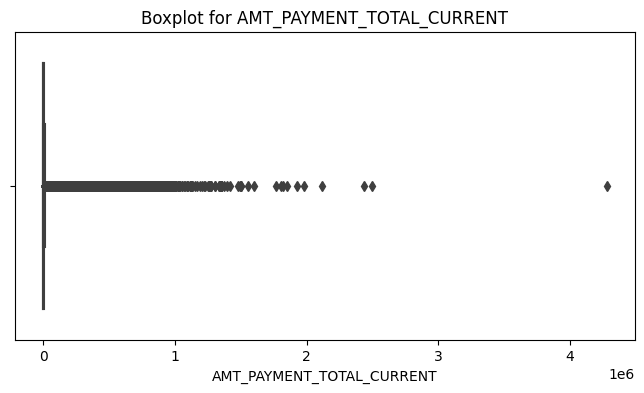

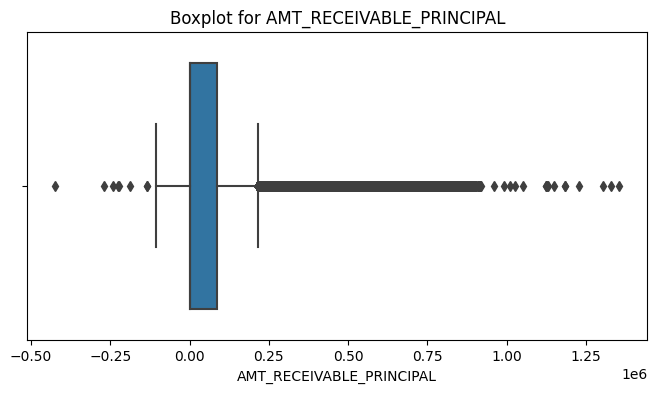

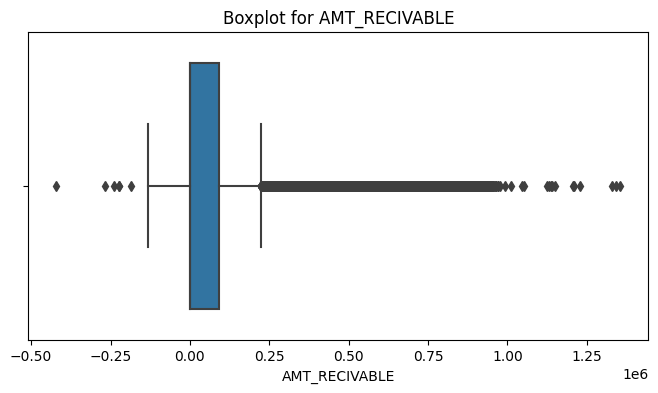

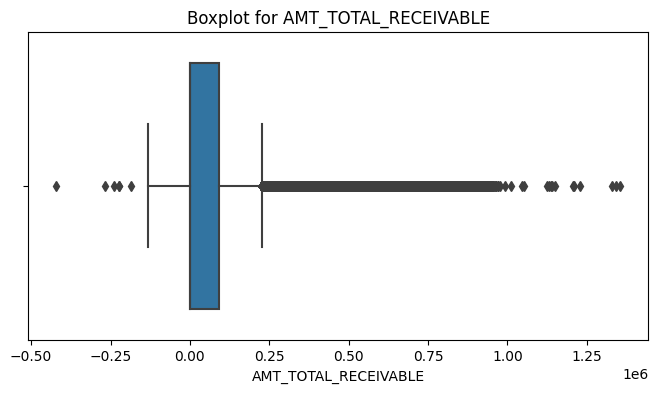

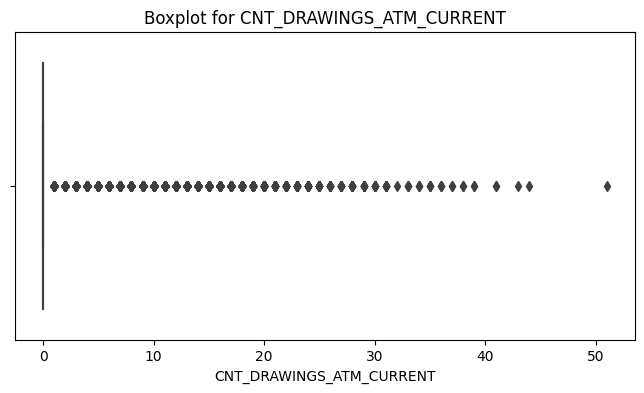

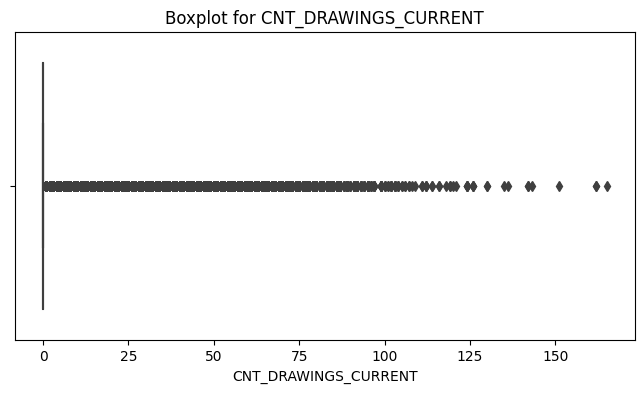

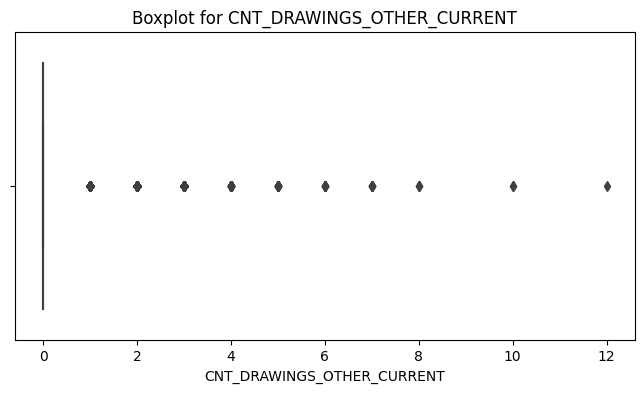

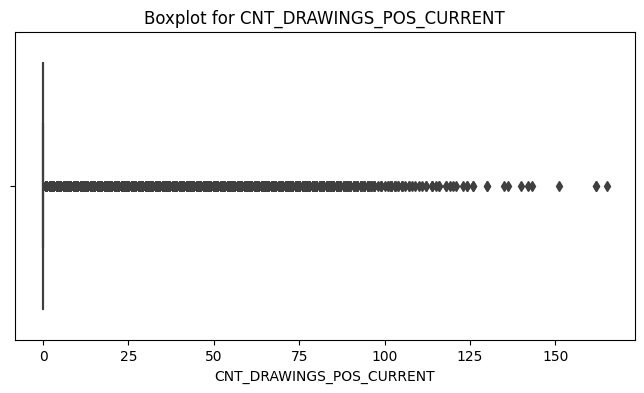

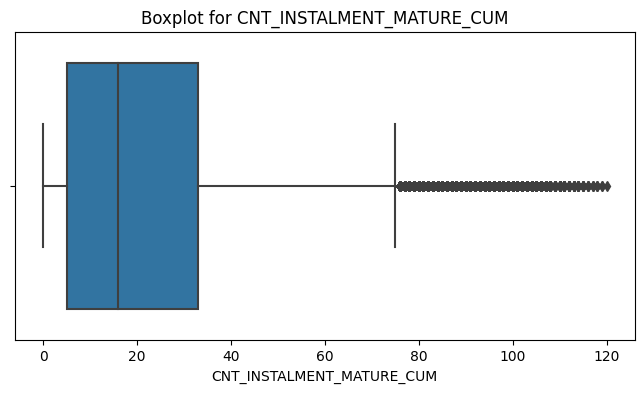

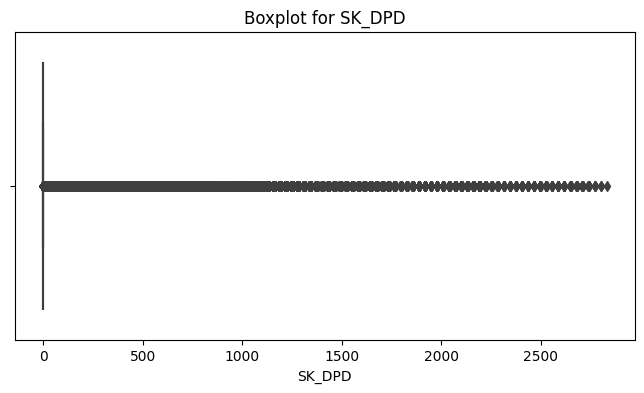

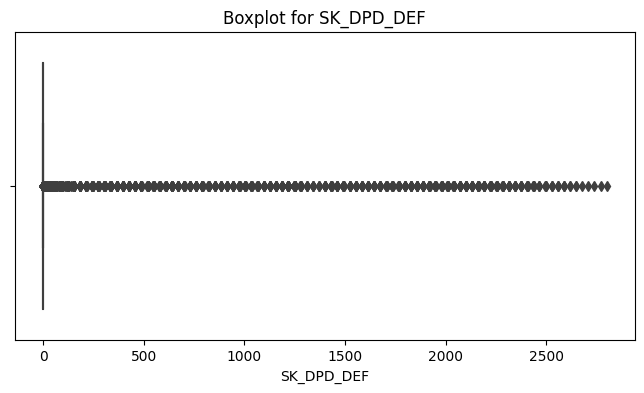

Rows with outliers:
         SK_ID_PREV  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
0           2582071              -1    63975.555                    45000   
4           2582071             -59    70475.850                    67500   
8           2582071             -58    66873.915                    67500   
18          2582071             -10    41272.740                    45000   
20          2582071             -92    59557.770                    67500   
...             ...             ...          ...                      ...   
3227946     2293258              -2   146628.000                   247500   
3227947     1773670              -2   228528.675                   450000   
3227948     1312910              -2    92677.185                    90000   
3227954     1362365              -1   135000.000                        0   
3227956     1771062              -1   163102.500                   180000   

         AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT

In [13]:
outlier(credit_card_balance)

# 4. Checking missing values

In [14]:
def nan_percent(data):
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe

    Inputs:
        data (DataFrame): Input DataFrame

    Returns:
        DataFrame: A DataFrame containing the columns and their percentage of NaN values
    '''
    # Calculate the percentage of NaN values for each column
    nan_percentages = data.isnull().mean() * 100
    df_nan = nan_percentages.reset_index().rename(columns={0: 'Percentage_of_NaN', 'index': 'Column'})

    # Sorting the dataframe by decreasing order of percentage of NaN values
    df_nan = df_nan.sort_values(by='Percentage_of_NaN', ascending=False)

    return df_nan


def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 10), grid=False, rotation=90):
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values

    Inputs:
        df_nan (DataFrame): DataFrame containing columns and their NaN percentages
        title_name (str): Title for the plot
        tight_layout (bool, default=True): Whether to use tight layout for the plot
        figsize (tuple, default=(20, 10)): Size of the plot
        grid (bool, default=False): Whether to display gridlines on the plot
        rotation (int, default=90): Degree of rotation for x-tick labels
    '''

    # Filter for columns with non-zero NaN percentages
    df_nan_nonzero = df_nan[df_nan['Percentage_of_NaN'] > 0]

    if not df_nan_nonzero.empty:
        print(f"Number of columns with NaN values: {df_nan_nonzero.shape[0]}")

        # Plotting the Bar Plot for NaN percentages
        plt.figure(figsize=figsize)
        sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')
        plt.xticks(rotation=rotation)
        plt.xlabel(title_name, fontsize=13)
        plt.ylabel('Percentage of NaN', fontsize=13)
        plt.title(f'Percentage of NaN values in {title_name}', fontsize=22, weight='bold', pad=30)
        
        if grid:
            plt.grid(True)

        if tight_layout:
            plt.tight_layout()

        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")


In [15]:
nan_pv = nan_percent(credit_card_balance)
nan_pv

,Column,Percentage_of_NaN
9,AMT_PAYMENT_CURRENT,19.210029
14,CNT_DRAWINGS_ATM_CURRENT,18.765817
4,AMT_DRAWINGS_ATM_CURRENT,18.765817
6,AMT_DRAWINGS_OTHER_CURRENT,18.765817
7,AMT_DRAWINGS_POS_CURRENT,18.765817
17,CNT_DRAWINGS_POS_CURRENT,18.765817
16,CNT_DRAWINGS_OTHER_CURRENT,18.765817
8,AMT_INST_MIN_REGULARITY,8.190423
18,CNT_INSTALMENT_MATURE_CUM,8.190423
0,SK_ID_PREV,0.000000


Number of columns with NaN values: 9


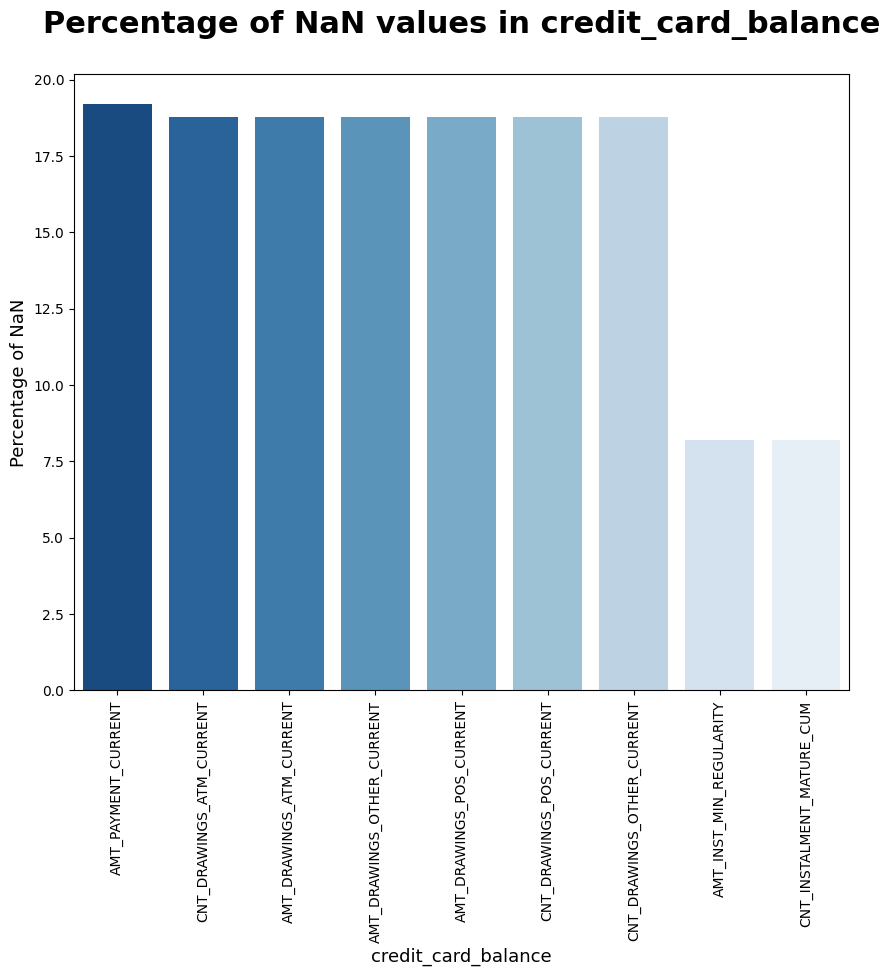

In [16]:
plot_nan_percent(nan_pv, 'credit_card_balance', tight_layout = False, figsize = (10,8))

## Observation 2

<ol><li>Out of the 23 features, 11 of these features contain some NaN values.</lli>
    <li>7 of these features have close to 20% NaN values. These features are mostly related to the Amounts of Drawing and Counts of Drawings. Other two of the features are related to the installments statistics.</li></ol>

# 5. Checking categorical columns

In [17]:

def get_category_columns(data):
    """
    Returns a DataFrame with details about categorical columns, including unique value counts and NaN percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing feature names, unique counts, and NaN percentages.
    """
    category_columns = data.select_dtypes(include='object').columns
    column_info = pd.DataFrame({
        'Feature': category_columns,
        'Nunique': [data[col].nunique() for col in category_columns],
        'Percentage_of_NaN': [data[col].isnull().mean() * 100 for col in category_columns]
    }).sort_values(by='Percentage_of_NaN', ascending=False)
    return column_info

def plot_category_summary(data, name, figsize=(12, 8)):
    """
    Plots the number of unique values for categorical columns.

    Parameters:
        data (pd.DataFrame): The categorical column summary DataFrame.
        name (str): The dataset name.
        figsize (tuple): Figure size for the plot.
    """
    data = data.sort_values(by='Nunique', ascending=False)
    plt.figure(figsize=figsize)
    sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')
    plt.title(f'Unique Value Counts in Categorical Columns - {name}', fontsize=18, weight='bold')
    plt.xlabel('Number of Unique Values')
    plt.ylabel('Categorical Columns')
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, column_name, figsize=(18, 6), show_percentage=True, rotation=0):
    """
    Plots the distribution of a categorical variable and optionally shows percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the categorical column to plot.
        figsize (tuple): Size of the plot figure.
        show_percentage (bool): Whether to display percentages on the bars.
        rotation (int): Degree of rotation for x-tick labels.
    """
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=value_counts.index, y=value_counts, palette='Blues_r')
    plt.title(f'Distribution of {column_name}', fontsize=18, weight='bold')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=rotation)

    if show_percentage:
        total = value_counts.sum()
        for i, count in enumerate(value_counts):
            plt.text(i, count + 0.02 * total, f'{(count / total) * 100:.1f}%', ha='center', fontsize='small')

    plt.tight_layout()
    plt.show()

def plot_defaulter_comparison(data, x):
    """
    Plots pie charts for distribution of a categorical variable by default status.

    Parameters:
        data (pd.DataFrame): The input DataFrame with a "TARGET" column.
        column_name (str): Name of the categorical column to plot.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    x1 = data[data["TARGET"] == 0][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[0].pie(x1, labels=x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = data[data["TARGET"] == 1][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

    ax[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1), title=x)

    for i in range(2):
        for text in ax[i].texts[::2]:
            text.set_visible(False)

    fig.suptitle(f"Distribution of {x}\nwith TARGET", fontsize=20)

    fig.tight_layout()
    plt.tight_layout()
    plt.show()


def print_unique_categories(data, column_name, show_counts=False):
    """
    Prints unique categories of a column and optionally their counts.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to analyze.
        show_counts (bool): Whether to display counts for each category.
    """
    unique_values = data[column_name].unique()
    print(f"Unique categories in '{column_name}': {unique_values}")

    if show_counts:
        counts = data[column_name].value_counts()
        print(f"\nCounts for each category in '{column_name}':\n{counts}")


In [18]:
cate_pv = get_category_columns(credit_card_balance)
cate_pv

,Feature,Nunique,Percentage_of_NaN
0,NAME_CONTRACT_STATUS,7,0.0


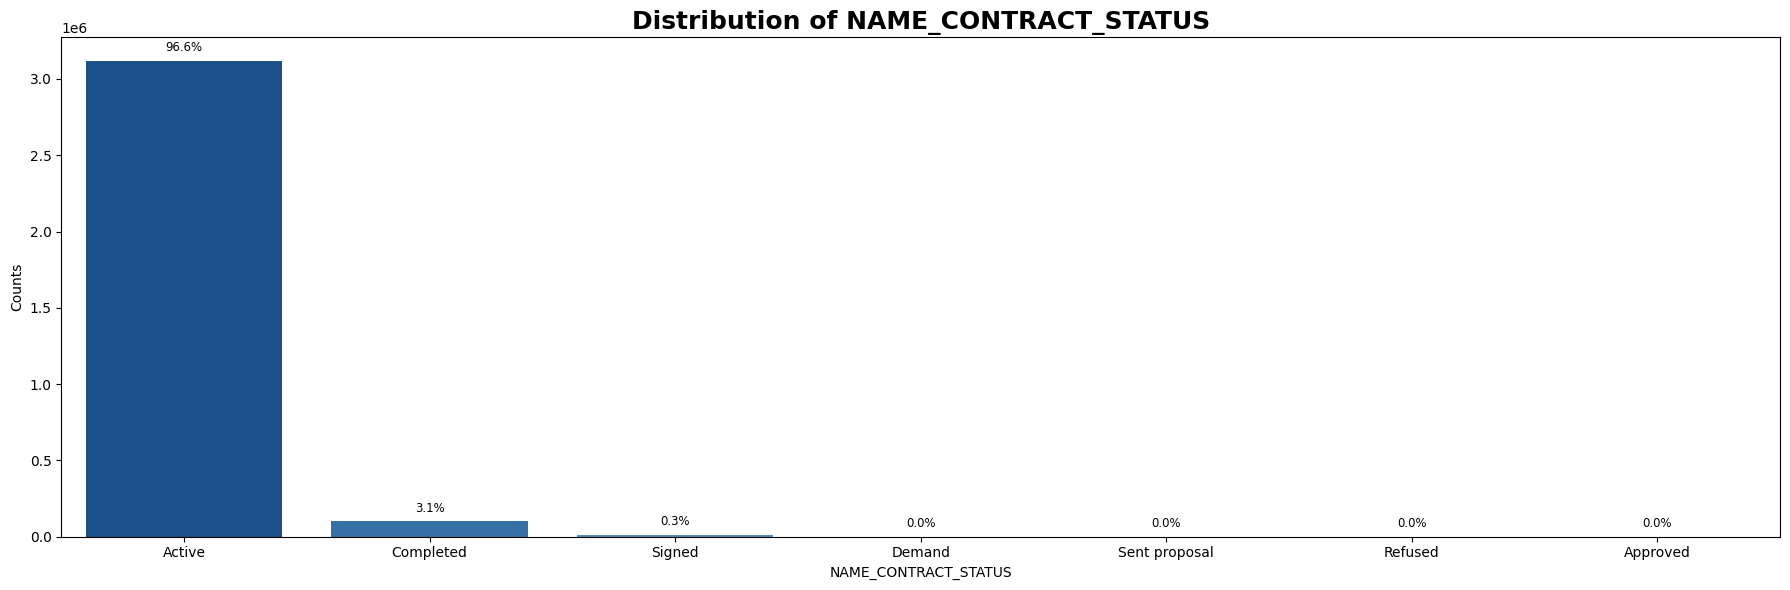

In [19]:
plot_categorical_distribution(credit_card_balance, 'NAME_CONTRACT_STATUS')

In [20]:
credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active           3116673
Completed         100031
Signed              9939
Demand               843
Sent proposal        460
Refused               14
Approved               5
Name: count, dtype: int64

NAME_CONTRACT_STATUS illustrate the number of previous application which are still active. These active previous applications occupy the most parts of previous application status
cho thay da so khoan vay truoc deu dang phai tra

# 6. EDA

## **6.1. Correlation**

In [21]:

class CorrelationMatrix:
    def __init__(self, data, columns_to_drop=None, figsize=(25, 23), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues'):
        self.data = data
        self.columns_to_drop = columns_to_drop if columns_to_drop else []
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap
        self.corr_data = None

    def plot_correlation_matrix(self, round_decimals=2):
        """Plots the correlation matrix heatmap."""
        data = self.data.drop(self.columns_to_drop + ['TARGET'], axis=1, errors='ignore')
        self.corr_data = data.corr(numeric_only=True)

        # Create mask for upper triangle
        mask = None
        if self.mask_upper:
            mask = np.triu(np.ones_like(self.corr_data, dtype=bool))

        # Plot heatmap
        plt.figure(figsize=self.figsize)
        sns.heatmap(
            self.corr_data.round(round_decimals),
            annot=True,
            mask=mask,
            cmap=self.cmap,
            linewidths=self.linewidth,
            fmt=f".{round_decimals}f"
        )
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Correlation Heatmap for Numerical Features", size=20, weight='bold', pad=20)
        plt.tight_layout()
        plt.show()

    def target_top_corr(self, target_top_columns=10):
        """Returns the top correlated features with the target."""
        if 'TARGET' not in self.data:
            raise ValueError("Target column not found in data.")

        # Calculate correlations with target
        target_corr = self.data.corr(numeric_only=True)['TARGET']
        top_corr = target_corr.abs().sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': top_corr.index, 'Correlation': top_corr.values})

        return top_corr_df


def numeric_cor(data, round_decimals=2):
    """Plots the correlation of numerical features."""
    numeric_df = data.select_dtypes(include='number')
    numeric_df_corr = numeric_df.corr()

    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(numeric_df_corr, dtype=bool))
    sns.heatmap(
        numeric_df_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap='Blues',
        linewidth=0.5,
        fmt=f".{round_decimals}f"
    )
    plt.title("Correlation of Numerical Features", fontsize=20, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_phik_matrix(data, categorical_columns, figsize=(20, 20), mask_upper=True, linewidth=0.5, fontsize=10, cmap='Blues', show_target_top_corr=True, target_top_columns=10, round_decimals=2):
    """Plots the Phi-K correlation matrix for categorical features."""
    # Calculate Phi-K correlation
    data_for_phik = data[categorical_columns].astype(str)
    phik_corr = data_for_phik.phik_matrix()

    # Create mask
    mask = None
    if mask_upper:
        mask = np.triu(np.ones_like(phik_corr, dtype=bool))

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        phik_corr.round(round_decimals),
        annot=True,
        mask=mask,
        cmap=cmap,
        linewidths=linewidth,
        fmt=f".{round_decimals}f"
    )
    plt.title("Phi-K Correlation Heatmap for Categorical Features", fontsize=20, weight='bold', pad=20)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if show_target_top_corr and 'TARGET' in data.columns:
        phik_target = phik_corr['TARGET'].sort_values(ascending=False).iloc[1:target_top_columns+1]
        top_corr_df = pd.DataFrame({'Feature': phik_target.index, 'Phi-K Correlation': phik_target.values})
        print("Top correlated features with TARGET:")
        display(top_corr_df)


In [22]:
print("-"*90)
print("Merging TARGET with credit_card_balance Table")
credit_card_balance_merged = application_train[['TARGET','SK_ID_CURR']].merge(credit_card_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*90)

------------------------------------------------------------------------------------------
Merging TARGET with credit_card_balance Table
------------------------------------------------------------------------------------------


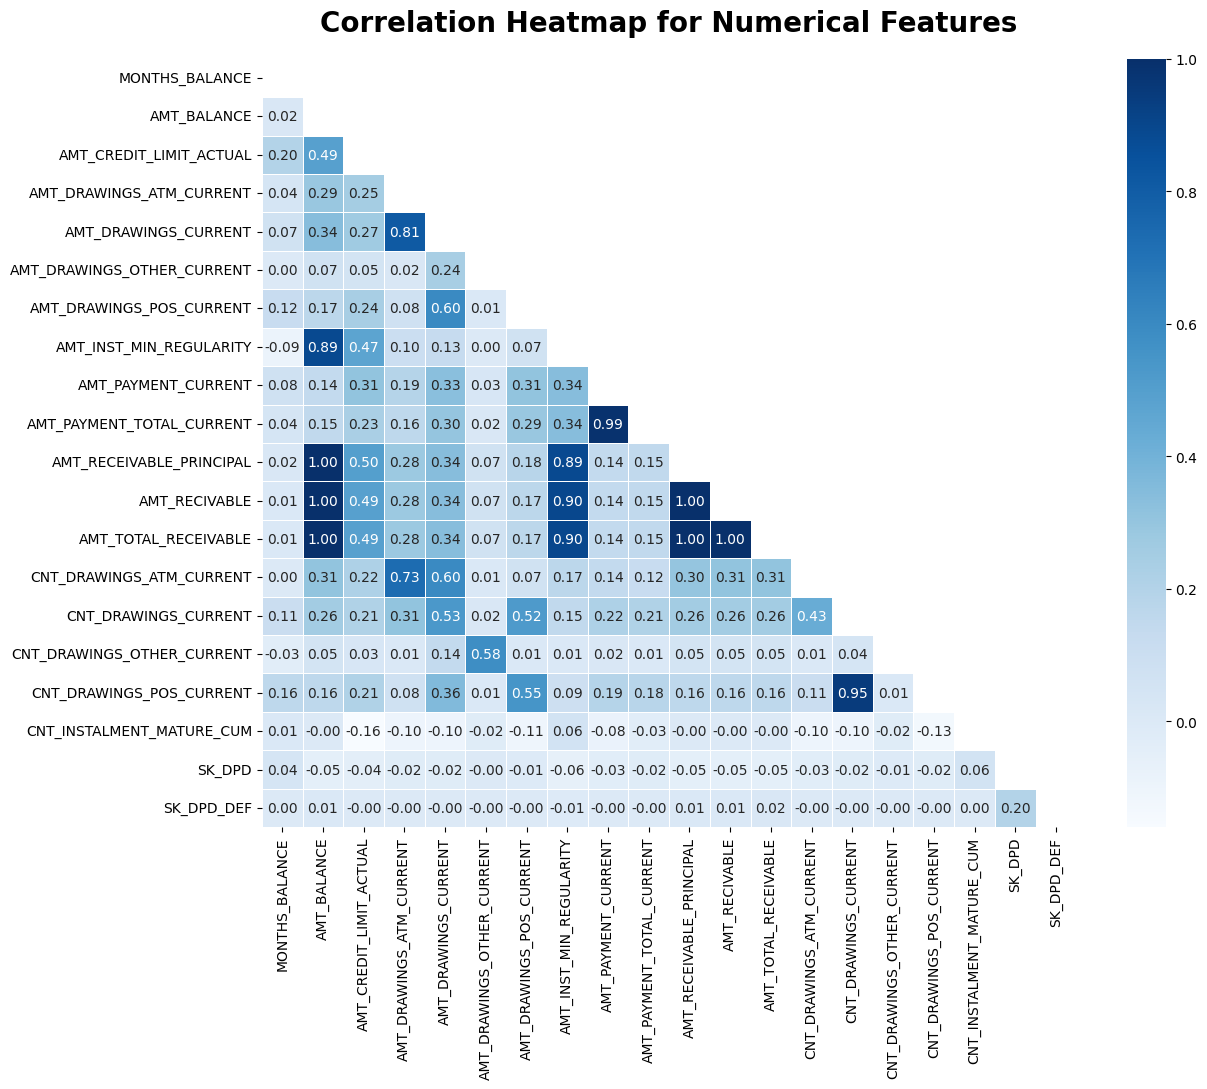

In [23]:
corr_mat = CorrelationMatrix(credit_card_balance_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (13,11))
corr_mat.plot_correlation_matrix()

In [24]:
#Seeing the top columns with highest phik-correlation with the target variable in credit_card_balance table
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 100)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-" * 100)

----------------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


,Feature,Correlation
0,AMT_BALANCE,0.048949
1,AMT_TOTAL_RECEIVABLE,0.048714
2,AMT_RECIVABLE,0.048667
3,AMT_RECEIVABLE_PRINCIPAL,0.048519
4,AMT_INST_MIN_REGULARITY,0.038444
5,CNT_DRAWINGS_CURRENT,0.038134
6,CNT_DRAWINGS_ATM_CURRENT,0.037370
7,MONTHS_BALANCE,0.034492
8,CNT_DRAWINGS_POS_CURRENT,0.030193
9,AMT_DRAWINGS_ATM_CURRENT,0.023930


----------------------------------------------------------------------------------------------------


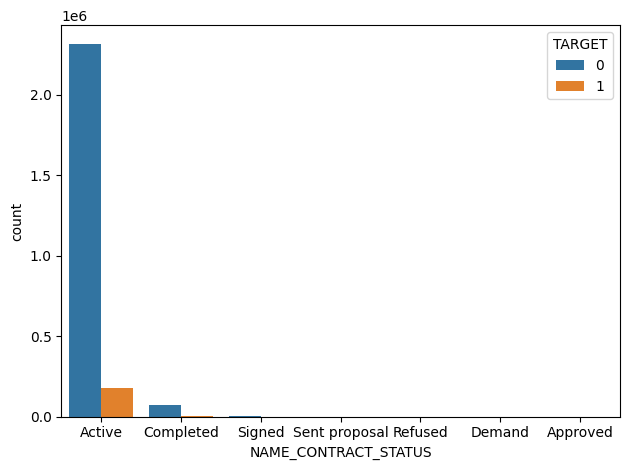

In [25]:
sns.countplot(x = credit_card_balance_merged["NAME_CONTRACT_STATUS"], hue = credit_card_balance_merged["TARGET"].astype('str'))

plt.tight_layout()
plt.show()

In [26]:

total_approved = credit_card_balance_merged[credit_card_balance_merged["NAME_CONTRACT_STATUS"] == "Completed"].shape[0]
default_approved = credit_card_balance_merged[(credit_card_balance_merged["NAME_CONTRACT_STATUS"] == "Completed") & (credit_card_balance_merged["TARGET"] == 1)].shape[0]
# default rate: rate that the loans become
print(f"default rate of customers with previous completed loans: {round(default_approved/total_approved, 3) * 100}%")

default rate of customers with previous completed loans: 6.7%


In [27]:
total_refused = credit_card_balance_merged[credit_card_balance_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = credit_card_balance_merged[(credit_card_balance_merged["NAME_CONTRACT_STATUS"] == "Refused") & (credit_card_balance_merged["TARGET"] == 0)].shape[0]

print(f"Rate of customers who were denied previous loans but successfully \
repaid the current loans: {round(nondefault_refused/total_refused, 3) * 100}%")

Rate of customers who were denied previous loans but successfully repaid the current loans: 84.6%


In [28]:
def plot_distribution(data, column_name, column_name2=None,
                      plot_type='dist', nrows=1, ncols=2,
                      figsize=(12, 6), dropna=False,
                      sort_values=False, bins='auto', palette='Blues_r'):
    """
    Function to plot the distribution of a variable related to a target variable.
    """
    if plot_type == 'scatter' and column_name2 is None:
        raise ValueError("You must provide `column_name2` for scatter plots.")
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()

    if dropna:
        data = data.dropna(subset=[column_name, column_name2] if column_name2 else [column_name])
    if sort_values:
        data = data.sort_values(by=column_name)

    targets = data['TARGET'].unique()
    for i, target in enumerate(targets):
        subset = data[data['TARGET'] == target]
        title = f"Target = {target}"
        
        if plot_type == 'dist':
            sns.histplot(subset[column_name], bins=bins, kde=True, ax=ax[i])
        elif plot_type == 'hist':
            sns.histplot(subset[column_name], bins=bins, kde=False, ax=ax[i])
        elif plot_type == 'count':
            sns.countplot(x=subset[column_name], ax=ax[i], palette=palette)
        elif plot_type == 'box':
            sns.boxplot(x=subset[column_name], ax=ax[i], orient='h')
        elif plot_type == 'scatter':
            sns.scatterplot(
                x=subset[column_name],
                y=subset[column_name2],
                ax=ax[i],
                color="blue" if target == 0 else "orange"  # Assign colors manually
            )

        ax[i].set_title(title)
        ax[i].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()


In [29]:
credit_card_balance_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763985 entries, 0 to 2763984
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   TARGET                      int64  
 1   SK_ID_CURR                  int64  
 2   SK_ID_PREV                  float64
 3   MONTHS_BALANCE              float64
 4   AMT_BALANCE                 float64
 5   AMT_CREDIT_LIMIT_ACTUAL     float64
 6   AMT_DRAWINGS_ATM_CURRENT    float64
 7   AMT_DRAWINGS_CURRENT        float64
 8   AMT_DRAWINGS_OTHER_CURRENT  float64
 9   AMT_DRAWINGS_POS_CURRENT    float64
 10  AMT_INST_MIN_REGULARITY     float64
 11  AMT_PAYMENT_CURRENT         float64
 12  AMT_PAYMENT_TOTAL_CURRENT   float64
 13  AMT_RECEIVABLE_PRINCIPAL    float64
 14  AMT_RECIVABLE               float64
 15  AMT_TOTAL_RECEIVABLE        float64
 16  CNT_DRAWINGS_ATM_CURRENT    float64
 17  CNT_DRAWINGS_CURRENT        float64
 18  CNT_DRAWINGS_OTHER_CURRENT  float64
 19  CNT_DRAWINGS_POS_CURR

AMT_BALANCE

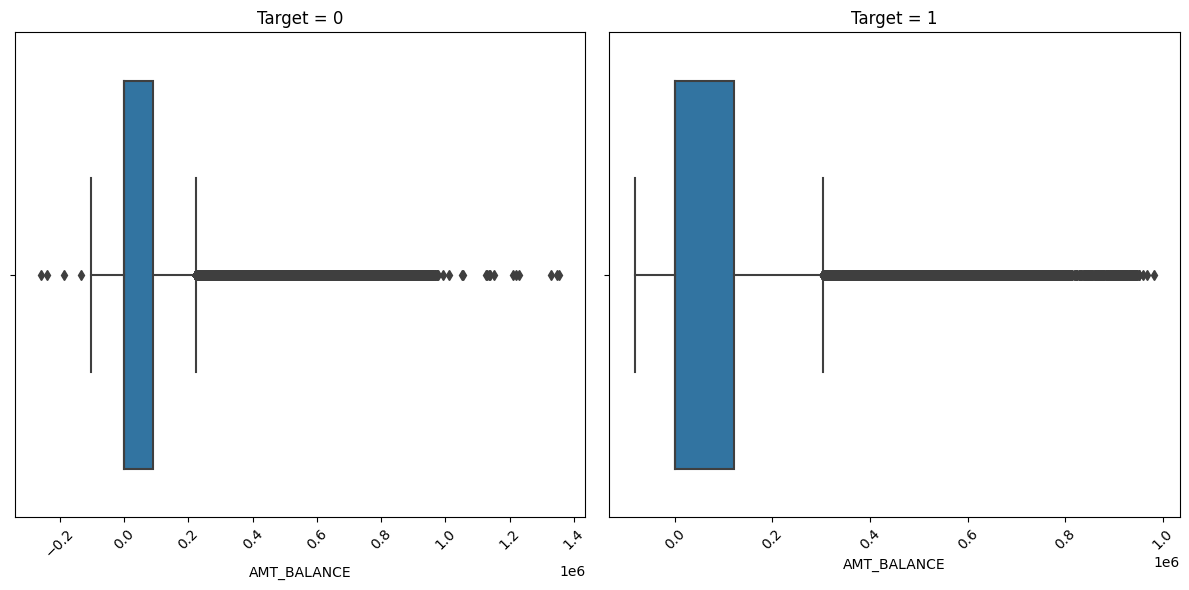

In [30]:
plot_distribution(data= credit_card_balance_merged, column_name = 'AMT_BALANCE', plot_type = 'box')

From the above plot, it can be seen that the Defaulters have a higher value of AMT_BALANCE as compared to Non-Defaulters. They show a higher values of all the quantiles and even the whiskers. This could imply that the Credit amount for Defaulters could also be relatively higher as compared to Non-Defaulters.

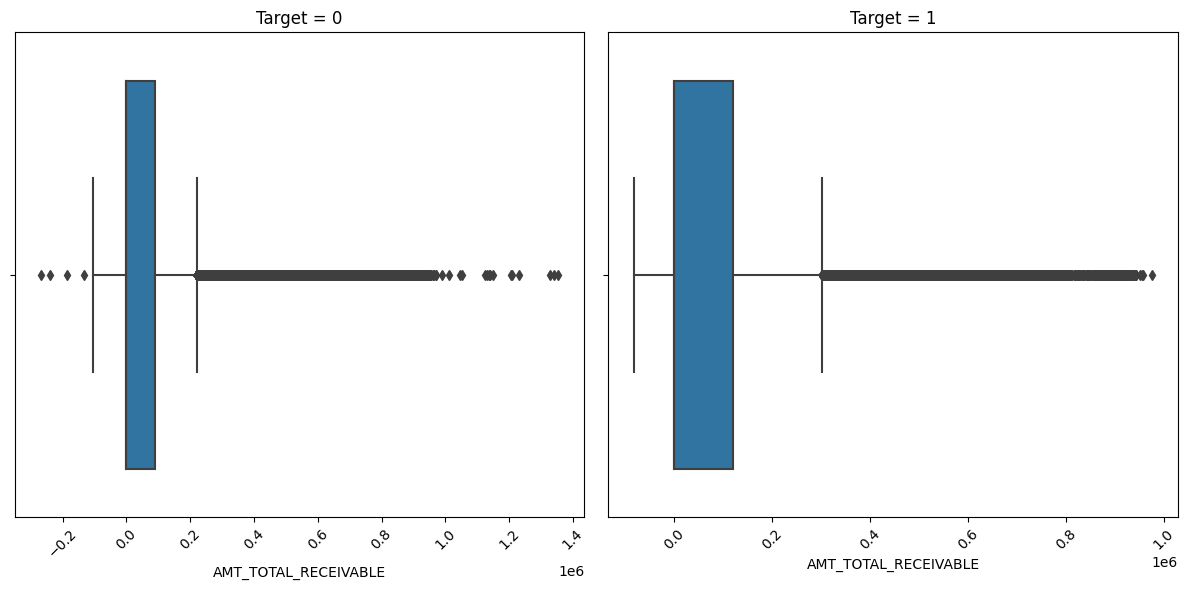

In [31]:
plot_distribution(data= credit_card_balance_merged, column_name = 'AMT_TOTAL_RECEIVABLE', plot_type = 'box')

This plot shows that the Non-Defaulters usually had higher range of values for the number of tota receivable as compared to Defaulters. This might show the defaulting behaviour, where in the defaulters usually would pay fewer number of installments on their previous credit and leave the total recevable increase.

In [32]:
credit_card_balance_merged['AMT_TOTAL_RECEIVABLE'].describe()

count    2.587512e+06
mean     5.883499e+04
std      1.057702e+05
min     -2.688345e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.046298e+04
max      1.354829e+06
Name: AMT_TOTAL_RECEIVABLE, dtype: float64

In [33]:
credit_card_balance_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763985 entries, 0 to 2763984
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   TARGET                      int64  
 1   SK_ID_CURR                  int64  
 2   SK_ID_PREV                  float64
 3   MONTHS_BALANCE              float64
 4   AMT_BALANCE                 float64
 5   AMT_CREDIT_LIMIT_ACTUAL     float64
 6   AMT_DRAWINGS_ATM_CURRENT    float64
 7   AMT_DRAWINGS_CURRENT        float64
 8   AMT_DRAWINGS_OTHER_CURRENT  float64
 9   AMT_DRAWINGS_POS_CURRENT    float64
 10  AMT_INST_MIN_REGULARITY     float64
 11  AMT_PAYMENT_CURRENT         float64
 12  AMT_PAYMENT_TOTAL_CURRENT   float64
 13  AMT_RECEIVABLE_PRINCIPAL    float64
 14  AMT_RECIVABLE               float64
 15  AMT_TOTAL_RECEIVABLE        float64
 16  CNT_DRAWINGS_ATM_CURRENT    float64
 17  CNT_DRAWINGS_CURRENT        float64
 18  CNT_DRAWINGS_OTHER_CURRENT  float64
 19  CNT_DRAWINGS_POS_CURR

In [34]:
credit_card_balance_merged[credit_card_balance_merged['AMT_TOTAL_RECEIVABLE']<0]

,TARGET,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
15,0,53466,1843384.0,-43.0,804.195,180000.0,0.0,0.0,0.0,0.0,9000.000,55485.000,55485.0,0.0,-563.355,-563.355,0.0,0.0,0.0,0.0,32.0,Active,0.0,0.0
25,0,53466,1843384.0,-39.0,0.000,180000.0,0.0,0.0,0.0,0.0,0.000,563.355,0.0,0.0,-563.355,-563.355,0.0,0.0,0.0,0.0,33.0,Active,0.0,0.0
30,0,53466,1843384.0,-42.0,0.000,180000.0,0.0,0.0,0.0,0.0,804.195,1367.550,0.0,0.0,-563.355,-563.355,0.0,0.0,0.0,0.0,33.0,Active,0.0,0.0
75,0,53466,1843384.0,-41.0,0.000,180000.0,0.0,0.0,0.0,0.0,0.000,563.355,0.0,0.0,-563.355,-563.355,0.0,0.0,0.0,0.0,33.0,Active,0.0,0.0
81,0,53466,1843384.0,-40.0,0.000,180000.0,0.0,0.0,0.0,0.0,0.000,563.355,0.0,0.0,-563.355,-563.355,0.0,0.0,0.0,0.0,33.0,Active,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763720,0,39650,2789041.0,-41.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,220.410,0.0,0.0,-220.410,-220.410,0.0,0.0,0.0,0.0,29.0,Active,0.0,0.0
2763726,0,39650,2789041.0,-45.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,220.410,0.0,0.0,-220.410,-220.410,0.0,0.0,0.0,0.0,29.0,Active,0.0,0.0
2763732,0,39650,2789041.0,-42.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,220.410,0.0,0.0,-220.410,-220.410,0.0,0.0,0.0,0.0,29.0,Active,0.0,0.0
2763747,0,39650,2789041.0,-43.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,220.410,0.0,0.0,-220.410,-220.410,0.0,0.0,0.0,0.0,29.0,Active,0.0,0.0


In [35]:
credit_card_balance_sorted = credit_card_balance.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
credit_card_balance_sorted

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,1745718,-1,12814.605,180000,0.0,25976.250,0.0,25976.250,0.000,10572.345,8322.345,12814.605,12814.605,12814.605,0.0,10,0.0,10.0,1.0,Active,0,0
1,1,1723965,-1,218401.290,225000,0.0,0.000,0.0,0.000,11274.165,11700.000,11700.000,213782.985,218401.290,218401.290,0.0,0,0.0,0.0,8.0,Active,0,0
2,3,2613228,-1,140479.155,135000,0.0,3653.055,0.0,3653.055,7008.615,9078.435,9078.435,134746.965,138771.090,138771.090,0.0,3,0.0,3.0,9.0,Active,0,0
3,7,2765329,-1,0.000,0,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Completed,0,0
4,9,1989688,-1,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,1.0,Completed,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87447,307501,1682952,-3,0.000,247500,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
87448,307504,1025205,-1,0.000,45000,0.0,0.000,0.0,0.000,0.000,118.935,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,40.0,Active,0,0
87449,307505,2764693,-4,0.000,135000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
87450,307508,1320688,-1,0.000,900000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [36]:
credit_card_balance_sorted["Completed_Flag"] = credit_card_balance_sorted["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
credit_card_balance_sorted["Completed_Count"] = credit_card_balance_sorted.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
credit_card_balance_sorted.drop(["Completed_Flag"], axis=1, inplace= True)
credit_card_balance_sorted.Completed_Count.value_counts()

Completed_Count
0    76319
1    10974
2      155
3        4
Name: count, dtype: int64

In [37]:
ccb_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], credit_card_balance_sorted, how= "left", on=["SK_ID_CURR"])
ccb_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,278621,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139008,0,1489396.0,-1.0,0.0,270000.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0,0.0
2,138348,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,219374,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246465,90253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246466,9027,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246467,163598,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246468,300375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


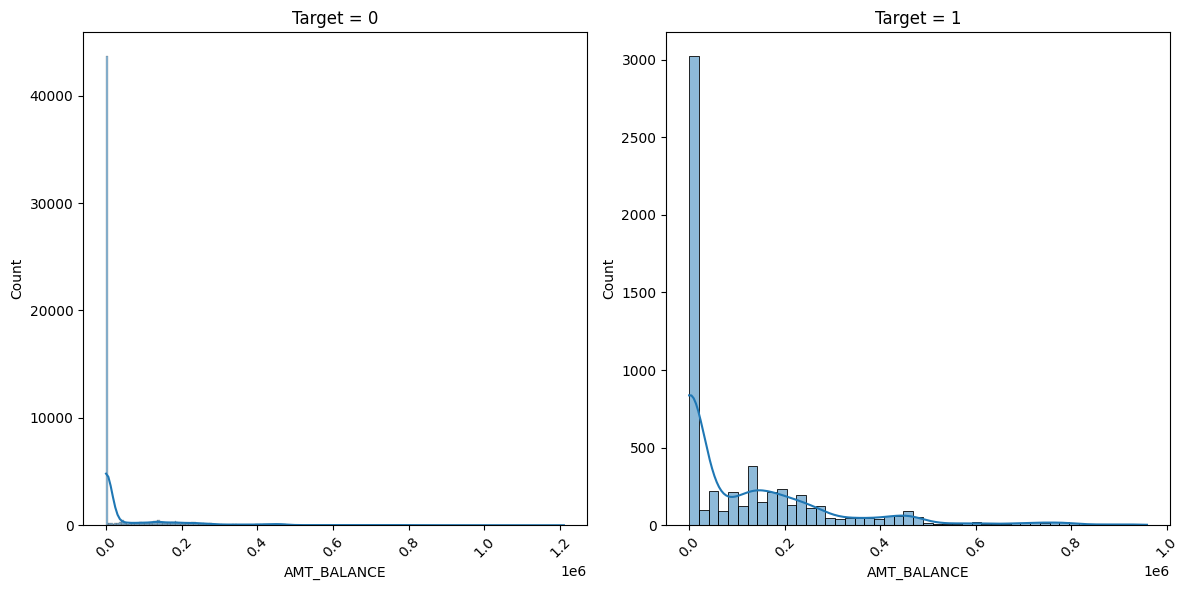

In [38]:
plot_distribution(ccb_merged, 'AMT_BALANCE', 'dist')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


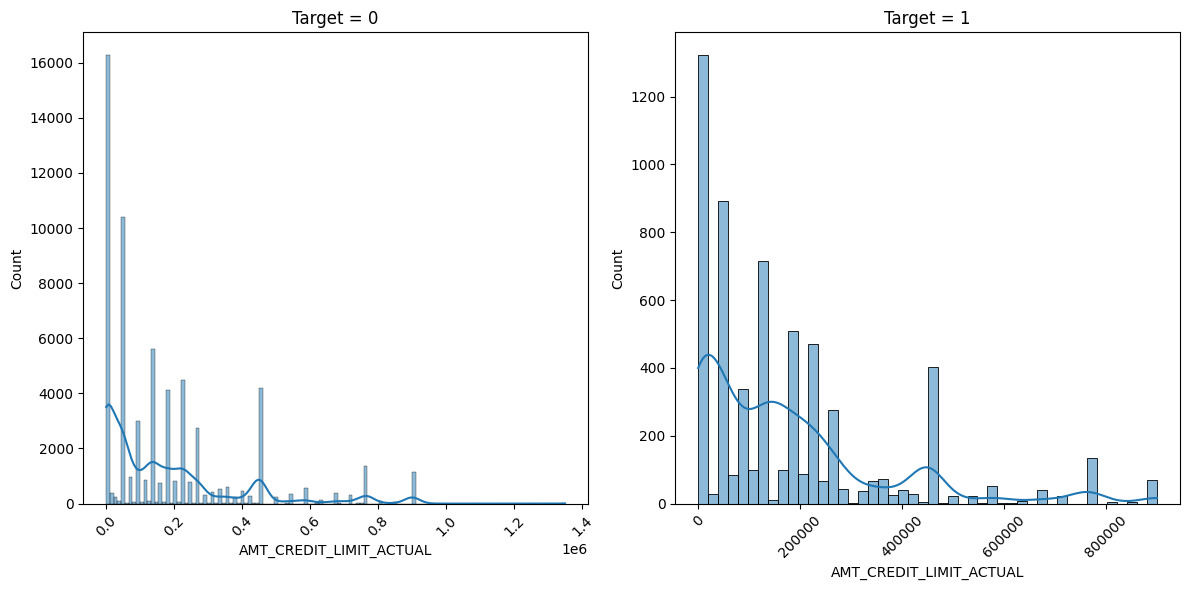

In [39]:
plot_distribution(ccb_merged, 'AMT_CREDIT_LIMIT_ACTUAL', 'dist')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


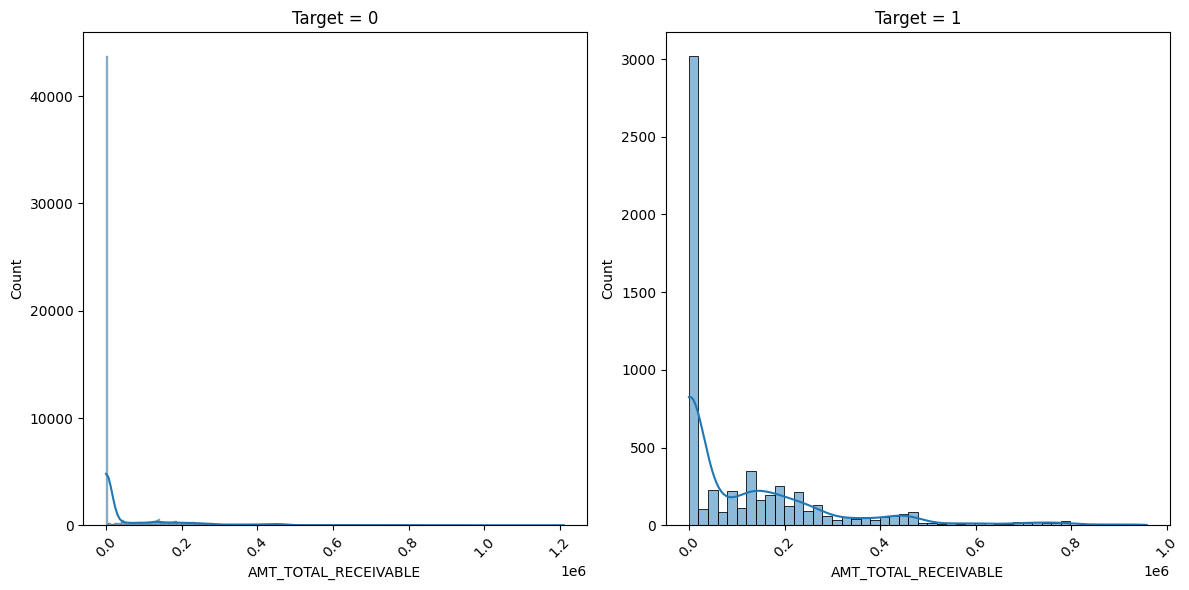

In [40]:
plot_distribution(ccb_merged, 'AMT_TOTAL_RECEIVABLE', 'dist')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


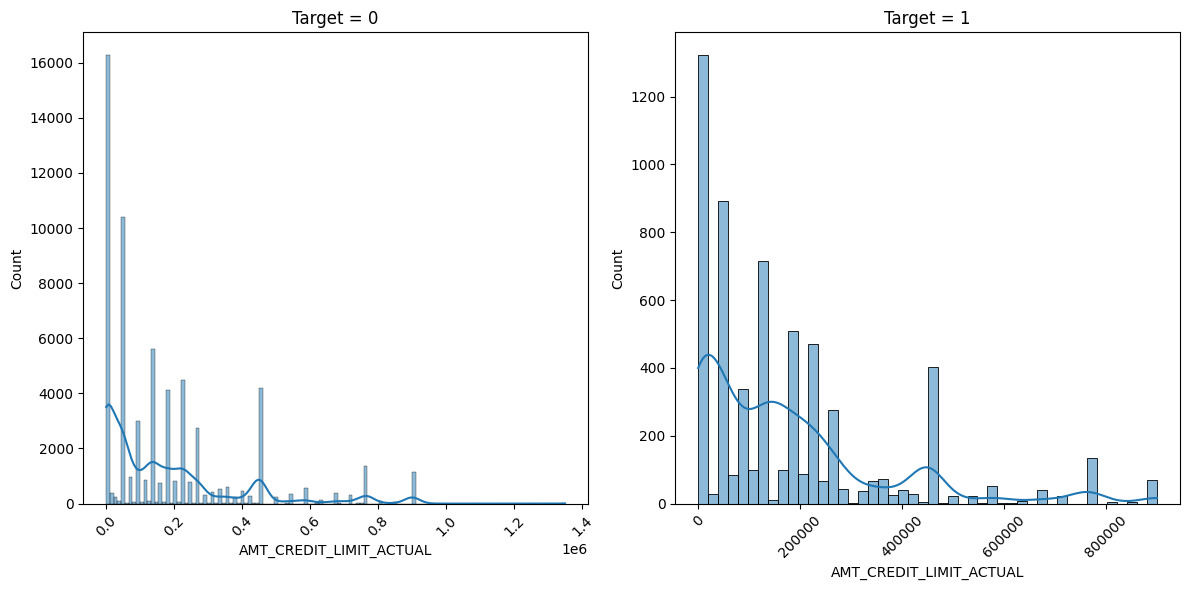

In [41]:
plot_distribution(ccb_merged, 'AMT_CREDIT_LIMIT_ACTUAL', 'dist')

Additionally, a table showcasing rows with potential outliers in several columns is presented.\
Notation: Multi columns has high correlation, might be drop or need a way to handling\
Two specific features, 'CNT_DRAWINGS_POS_CURRENT' and 'NAME_CONTRACT_STATUS,' are discussed in detail. The former exhibits a relatively high percentage of missing values (19.00%), suggesting a need for careful handling, while the latter, a categorical feature, has no missing values, simplifying the preprocessing step.

In [42]:
ccb_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246470 entries, 0 to 246469
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  246470 non-null  int64  
 1   TARGET                      246470 non-null  int64  
 2   SK_ID_PREV                  69997 non-null   float64
 3   MONTHS_BALANCE              69997 non-null   float64
 4   AMT_BALANCE                 69997 non-null   float64
 5   AMT_CREDIT_LIMIT_ACTUAL     69997 non-null   float64
 6   AMT_DRAWINGS_ATM_CURRENT    49043 non-null   float64
 7   AMT_DRAWINGS_CURRENT        69997 non-null   float64
 8   AMT_DRAWINGS_OTHER_CURRENT  49043 non-null   float64
 9   AMT_DRAWINGS_POS_CURRENT    49043 non-null   float64
 10  AMT_INST_MIN_REGULARITY     69997 non-null   float64
 11  AMT_PAYMENT_CURRENT         49005 non-null   float64
 12  AMT_PAYMENT_TOTAL_CURRENT   69997 non-null   float64
 13  AMT_RECEIVABLE